In [1]:
%cd ..

c:\Users\nakag\c3\pbl-ssc_with_gfootball


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
base_dirs = ['./outputs/shoot4', './outputs/initial']

output_dfs = list()
for base_dir in base_dirs:
    result_df = pd.read_csv(os.path.join(base_dir, 'results_1459164.csv'))
    shoot_df = pd.read_csv(os.path.join(base_dir, 'shoots_1459164.csv'))

    result_df['is_win'] = result_df['chance_team'] == result_df['winner']

    shoot_df = shoot_df.loc[shoot_df['shoot_x'] < 0]

    shoot_integrated_for_df = list()
    for (n_iter, n_sub_iter), group in shoot_df.groupby(['n_iter', 'n_sub_iter']):
        shoot_integrated_for_df.append({
            'n_iter': n_iter,
            'n_sub_iter': n_sub_iter,
        })

    shoot_integrated_df = pd.DataFrame(shoot_integrated_for_df)
    shoot_integrated_df['is_shoot'] = True

    result_df = result_df.merge(shoot_integrated_df, on=['n_iter', 'n_sub_iter'], how='left')
    result_df['is_shoot'] = result_df['is_shoot'].fillna(False)

    output_for_df = list()
    for n_iter, group in result_df.groupby('n_iter'):
        win_ratio = group['is_win'].mean()
        shoot_ratio = group['is_shoot'].mean()
        output_for_df.append({
            'n_iter': n_iter,
            'shoot_ratio': shoot_ratio,
            'win_ratio': win_ratio,
        })
    output_df = pd.DataFrame(output_for_df)
    output_df['exam_id'] = os.path.basename(base_dir)
    output_dfs.append(output_df)

concat_output_df = pd.concat(output_dfs, ignore_index=True)
concat_output_df

C:\Users\nakag\AppData\Local\Temp\ipykernel_5460\2319553306.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df['is_shoot'] = result_df['is_shoot'].fillna(False)
C:\Users\nakag\AppData\Local\Temp\ipykernel_5460\2319553306.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df['is_shoot'] = result_df['is_shoot'].fillna(False)


,n_iter,shoot_ratio,win_ratio,exam_id
0,1,0.30,0.06,shoot4
1,2,0.25,0.05,shoot4
2,3,0.23,0.04,shoot4
3,4,0.27,0.12,shoot4
4,5,0.22,0.08,shoot4
...,...,...,...,...
195,96,0.04,0.04,initial
196,97,0.08,0.05,initial
197,98,0.15,0.06,initial
198,99,0.08,0.03,initial


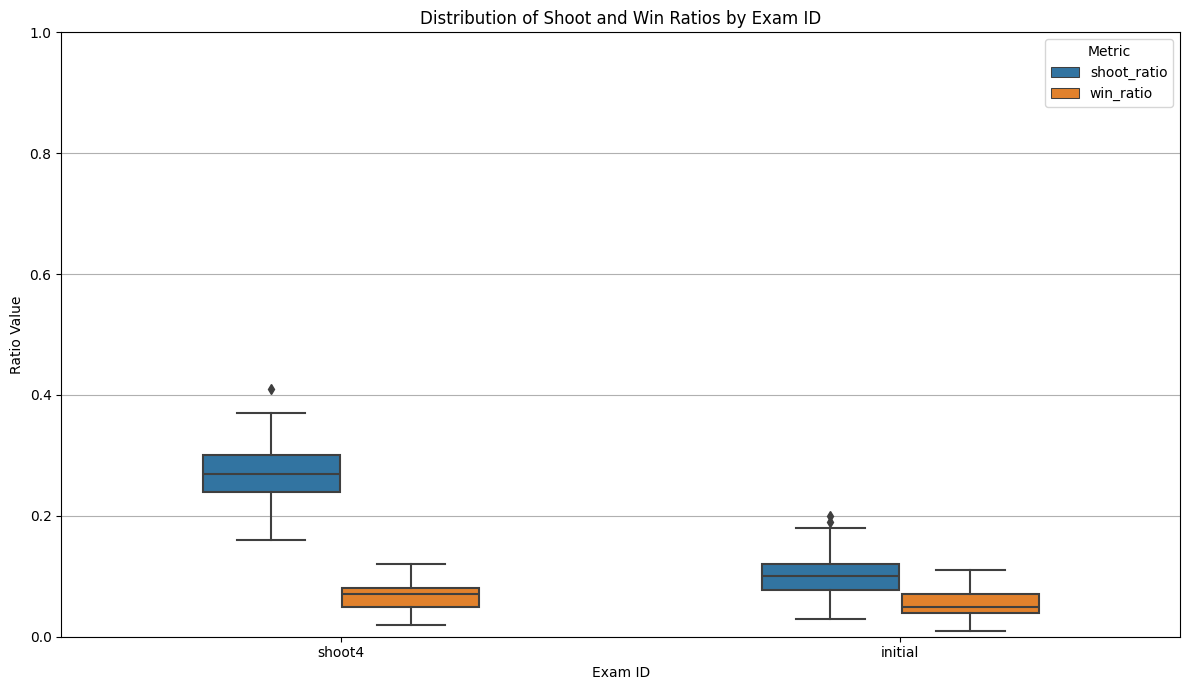

In [9]:
df = concat_output_df.copy()
df_melted = df.melt(id_vars=['n_iter', 'exam_id'], value_vars=['shoot_ratio', 'win_ratio'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 7))
sns.boxplot(x='exam_id', y='value', hue='metric', data=df_melted, width=0.5) # widthを0.5に設定
plt.title('Distribution of Shoot and Win Ratios by Exam ID')
plt.xlabel('Exam ID')
plt.ylabel('Ratio Value')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

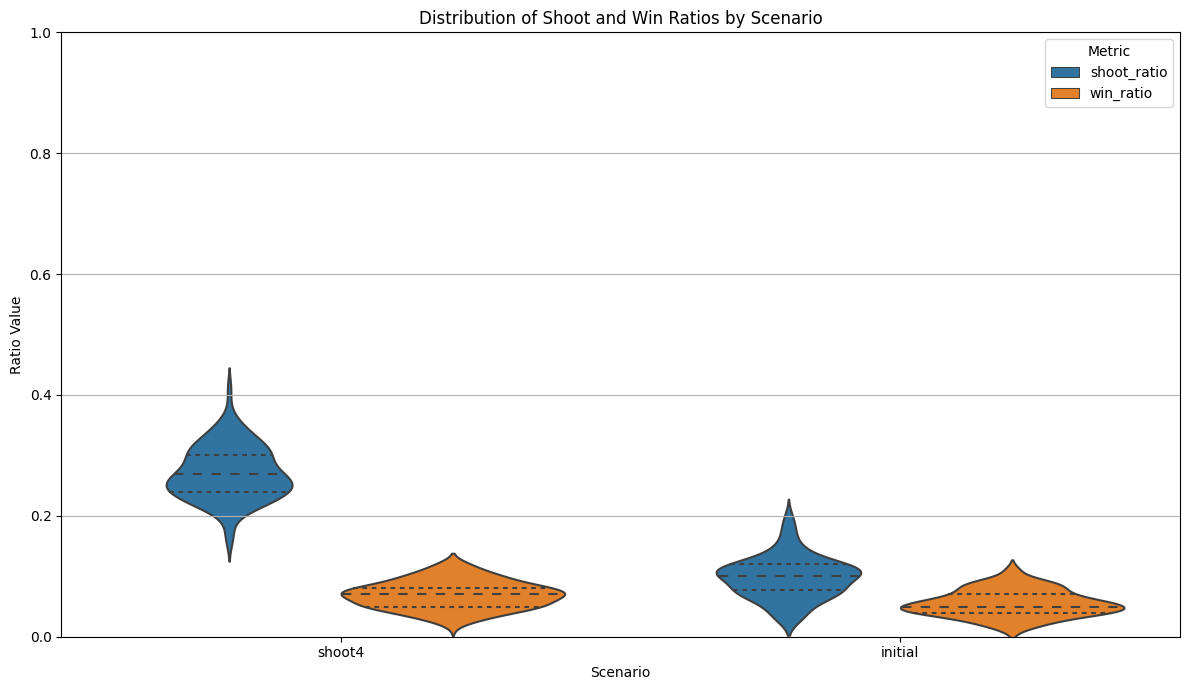

In [10]:
plt.figure(figsize=(12, 7))

# sns.violinplotを使用してバイオリンプロットを作成
# split=Trueは、hueのカテゴリが2つである場合に、片側のバイオリンとして表示することでスペースを節約する
sns.violinplot(x='exam_id', y='value', hue='metric', data=df_melted, split=False, inner='quartile')

plt.title('Distribution of Shoot and Win Ratios by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Ratio Value')
plt.ylim(0, 1) # Y軸の範囲を0から1に設定
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()